## Preface



First, load relevant dataset:



In [1]:
!pip install CFEdemands --update
import cfe

r = cfe.from_dataset('TanzanianNPS/tanzanian_nps.ds')


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


Also, choose reference prices:



In [3]:
x = 1936896.5 # Budget

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=2014).copy()

p.to_dataframe().fillna(1).squeeze()

,,t,prices
i,m,,
Beef Including Minced Sausage,1,2014,2500.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",1,2014,1.714286
Bread,1,2014,2.000000
"Buns, Cakes And Biscuits",1,2014,2.000000
Cassava Fresh,1,2014,1.200000
Chicken And Other Poultry,1,2014,8.333333
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",1,2014,1.363636
Coconuts (Mature/Immature),1,2014,1.428571
"Cooking Bananas, Plantains",1,2014,1.250000


And with $(x,p)$ defined we can calculate example demands:



In [10]:
c=r.demands(x,p)
c

i
Bengalgram dhal            0.797890
Chillies                   1.124429
Coconut                    0.694086
Complete meals in hotel    1.036076
Edible oils                0.634476
Gur (jaggery)              1.144852
Jowar/Sorghum              1.801083
Milk                       3.759372
Onion                      0.642948
Other spices               2.218956
Other vegetables           0.907468
Pan, betel, etc.           2.017497
Redgram dhal               1.328360
Rice                       2.720693
Sugar                      0.413503
Tea                        0.328889
Name: quantities, dtype: float64

Finally, define a function to change a single price in the vector $p$:



In [11]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

## Mapping to Nutrients



We&rsquo;ve seen how to map prices and budgets into vectors of consumption
quantities using `cfe.Result.demands`.  Next we want to think about
how to map these into bundles of *nutrients*.  The information needed
for the mapping comes from a &ldquo;Food Conversion Table&rdquo; (or database,
such as the [USDA Nutrition DataBase](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md)).   Here we&rsquo;ve adapted (with
thanks to Alessandro Tarozzi of the Universitat Pompeu Fabra) a food
conversion table developed by Gopalan et al (1980) to the foods
reported in the Indian ICRISAT data:



In [12]:
import pandas as pd
fct = pd.read_pickle('./IndianICRISAT/fct.df')

# Change some labels
d={'protein':'Protein',
   'fat':'Fat',
   'energy_kcal':'Calories',
   'calcium':'Calcium',
   'betacarotene':'Betacarotene',
   'thiamine':'Thiamine',
   'riboflavin':'Riboflavin',
   'niacin':'Niacin',
   'iron':'Iron',
   'ascorbic_total':'Ascorbic Acid'}

fct = fct.rename(columns=d)[list(d.values())]
fct.index = fct.index.droplevel('unit')
fct

,Protein,Fat,Calories,Calcium,Betacarotene,Thiamine,Riboflavin,Niacin,Iron,Ascorbic Acid
ICRISAT Food Label,,,,,,,,,,
Paddy (Local variety),78.099998,5.500000,3.513423e+03,8.110000e+01,0.000000,1.700000,0.600000,25.100000,7.200000,0.000000
Paddy (HYV),78.099998,5.500000,3.513423e+03,8.110000e+01,0.000000,1.700000,0.600000,25.100000,7.200000,0.000000
Rice (local variety),78.099998,5.500000,3.513423e+03,8.110000e+01,0.000000,1.700000,0.600000,25.100000,7.200000,0.000000
Rice (HYV variety),78.099998,5.500000,3.513423e+03,8.110000e+01,0.000000,1.700000,0.600000,25.100000,7.200000,0.000000
Wheat (Local variety),105.800003,15.000000,3.208895e+03,3.515000e+02,28.500000,4.400000,1.500000,25.250000,40.349998,0.000000
Wheat (HYV),105.800003,15.000000,3.208895e+03,3.515000e+02,28.500000,4.400000,1.500000,25.250000,40.349998,0.000000
Jowar/Sorghum (Local variety),99.700005,17.299999,3.339065e+03,2.760000e+02,82.900002,3.500000,1.400000,21.000000,39.500000,0.000000
Jowar/Sorghum (HYV),99.700005,17.299999,3.339065e+03,2.760000e+02,82.900002,3.500000,1.400000,21.000000,39.500000,0.000000
Bajra/Pearl millet (Local variety),102.699997,51.399998,2.987166e+03,2.589333e+02,267.266663,2.366667,1.900000,8.133333,60.766663,0.000000


We need the index of the Food Conversion Table (FCT) to match up with
the index of the vector of quantities demanded.   To manage this we
make use of the `align` method for `pd.DataFrames`:



In [13]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = fct.align(c,axis=0,join='inner')
print(fct0.index)

Index(['Redgram dhal', 'Bengalgram dhal', 'Milk', 'Sugar', 'Gur (jaggery)',
       'Edible oils', 'Onion', 'Chillies', 'Other vegetables', 'Coconut',
       'Other spices', 'Tea', 'Complete meals in hotel', 'Pan, betel, etc.'],
      dtype='object')


Now, since rows of `fct0` and `c0` match, we can obtain nutritional
outcomes from the inner (or dot, or matrix) product of the transposed
`fct0` and `c0`:



In [14]:
# The @ operator means matrix multiply
N = fct0.T@c0
N

Protein            759.278531
Fat               1253.205744
Calories         25525.056452
Calcium          14449.217756
Betacarotene     43277.091036
Thiamine            14.847352
Riboflavin          15.288670
Niacin             100.547678
Iron               512.171159
Ascorbic Acid     1297.300769
dtype: float64

Of course, since we can compute the nutritional content of a vector of
consumption goods `c0`, we can also use our demand functions to
compute nutrition as a *function* of prices and budget.



In [15]:
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

With this `nutrient_demand` function in hand, we can see how nutrient
outcomes vary with budget, given prices:



/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -2.91E-11.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[-1],i))


Text(0, 0.5, 'log nutrient')

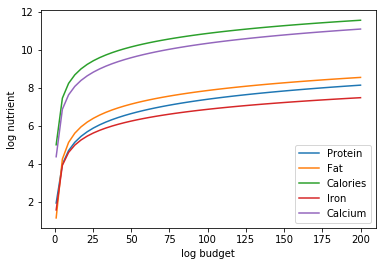

In [16]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,200,50)

UseNutrients = ['Protein','Fat','Calories','Iron','Calcium']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Now how does nutrition vary with prices?



Text(0, 0.5, 'log nutrient')

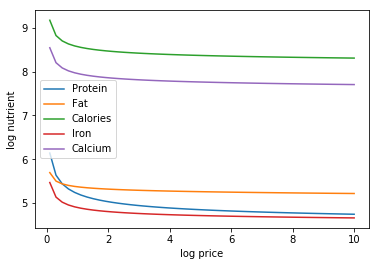

In [17]:
P = np.linspace(.1,10,50)

x = 10

plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices(p0,i='Bengalgram dhal')))[UseNutrients] for p0 in P},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log price')
plt.ylabel('log nutrient')

## Nutritional requirements



Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Indian
National Institute of Nutrition:



### Nutritional needs of individuals



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



In [18]:
rda=pd.DataFrame([x[1:] for x in RDA[1:]],columns=RDA[0][1:],index=[x[0] for x in RDA[1:]])
rda.to_pickle('rda.df')

NameError: name 'RDA' is not defined

### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the ICRISAT villages, the number of
different kinds of people can be computed by averaging over households:



In [19]:
# In 1975, averaged over households and villages
zbar = r.z.sel(t=75).mean(['j','m'])[:-1] # Leave out log HSize

Now, the inner/dot/matrix product between `zbar` and the `rda`
DataFrame of requirements will give us minimum requirements for the
average household:



In [20]:
rda = pd.read_pickle('rda.df')

# This matrix product gives minimum nutrient requirements for average
# household in 1975
hh_rda = rda.replace('',0).T@zbar
hh_rda

Calories         12360.456432
Protein            265.336100
Fat                169.020747
Calcium           4672.614108
Iron               106.327801
Betacarotene     25765.975104
Thiamine             6.270539
Riboflavin           7.028216
Niacin              81.668050
Ascorbic Acid      233.257261
dtype: float64

## Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.



In [21]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -2.91E-11.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[-1],i))


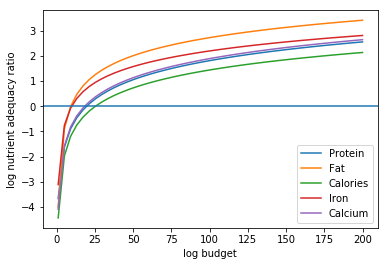

In [22]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of Bengalgram dahl:



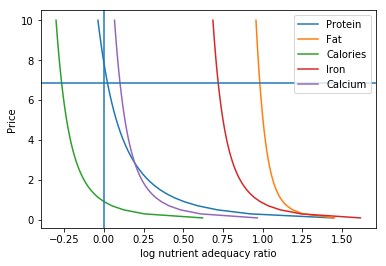

In [23]:
x = 20

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Bengalgram dhal')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Bengalgram dhal').values)

And varying the price of rice:



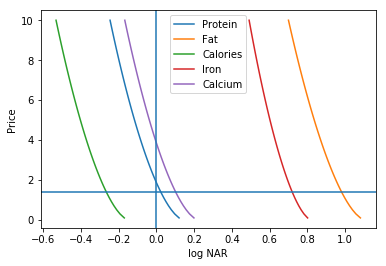

In [24]:
x = 20

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Rice')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log NAR')
plt.axvline(0)
plt.axhline(p.sel(i='Rice').values)